<a href="https://colab.research.google.com/github/Ye-Gao1/Neural-Network/blob/main/Improved_Neural_Networks_Food_Type_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Food Type Classifier


1. Dependecies and Data Downloads

In [2]:
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [3]:
try:
  os.mkdir('/content/food/')
except:
  print("/content/food/ already exists")
!gdown https://drive.google.com/uc?id=17K7m5uQ17NdhBoNF2H3Y5BeYQGeKbBph
!unzip -d /content/food/ /content/fFood.zip

Streaming output truncated to the last 5000 lines.
  inflating: /content/food/Fast Food Classification V2/Train/Taquito/Taquito-Train (1).jpeg  
  inflating: /content/food/Fast Food Classification V2/Train/Taquito/Taquito-Train (10).jpeg  
  inflating: /content/food/Fast Food Classification V2/Train/Taquito/Taquito-Train (100).jpeg  
  inflating: /content/food/Fast Food Classification V2/Train/Taquito/Taquito-Train (1000).jpeg  
  inflating: /content/food/Fast Food Classification V2/Train/Taquito/Taquito-Train (1001).jpeg  
  inflating: /content/food/Fast Food Classification V2/Train/Taquito/Taquito-Train (1002).jpeg  
  inflating: /content/food/Fast Food Classification V2/Train/Taquito/Taquito-Train (1003).jpeg  
  inflating: /content/food/Fast Food Classification V2/Train/Taquito/Taquito-Train (1004).jpeg  
  inflating: /content/food/Fast Food Classification V2/Train/Taquito/Taquito-Train (1005).jpeg  
  inflating: /content/food/Fast Food Classification V2/Train/Taquito/Taquito-Train

2. Locating the Bad Files

In [4]:
#Find Bad Files
from tqdm import tqdm
import imghdr
files = []
sizes = []
bad_images = []
for dir in ['/content/food/Fast Food Classification V2/Test', '/content/food/Fast Food Classification V2/Train', '/content/food/Fast Food Classification V2/Valid']:
  os.chdir(dir)
  for classname in os.listdir():
    os.chdir(str(dir)+'/'+str(classname))
    for filename in os.listdir():
      files.append(filename)
      filepath = str(dir)+'/'+str(classname)+'/'+str(filename)
      sizes.append(os.path.getsize(filepath))

      img_type = imghdr.what(filepath)
      if not(img_type=='jpeg' or img_type=='png'):
          print(f"{filepath} is not an image")
          bad_images.append(filepath)

/content/food/Fast Food Classification V2/Train/Hot Dog/Hot Dog - Train (39).jpg is not an image
/content/food/Fast Food Classification V2/Train/Hot Dog/Hot Dog - Train (11).jpg is not an image
/content/food/Fast Food Classification V2/Train/Hot Dog/Hot Dog - Train (75).jpg is not an image
/content/food/Fast Food Classification V2/Train/Hot Dog/Hot Dog - Train (59).jpg is not an image
/content/food/Fast Food Classification V2/Train/Hot Dog/Hot Dog - Train (73).jpg is not an image
/content/food/Fast Food Classification V2/Train/Hot Dog/Hot Dog - Train (42).jpg is not an image
/content/food/Fast Food Classification V2/Train/Donut/Donut (16).jpg is not an image


In [5]:
#Then get rid of the bad files
import shutil
for filepath in bad_images:
  shutil.move(filepath, '/content/')

3. Pick the Foods you Want!

In [6]:
all_classes = ['Taquito', 'Taco', 'Crispy Chicken', 'Donut', 'Baked Potato', 'Hot Dog', 'Pizza', 'Fries', 'Sandwich,', 'Burger']

classes = ['Taquito', 'Taco', 'Crispy Chicken', 'Baked Potato', 'Pizza', 'Sandwich'] #Classes you DO want

delete = []
for food in all_classes:
  if food not in classes:
    delete.append(food)
print(delete)

for split in ['Test', 'Train', 'Valid']:
  for classname in delete:
    folder = os.path.join('/content/food/Fast Food Classification V2', split, classname)
    try:
      shutil.move(folder, os.path.join('/content/', split))
    except:
      pass

['Donut', 'Hot Dog', 'Fries', 'Sandwich,', 'Burger']


4. Datagen Baby!

##Old Datagen

In [13]:
from tqdm import tqdm
import tensorflow as tf
import os

splits = ["/content/food/Fast Food Classification V2/Train", "/content/food/Fast Food Classification V2/Valid", "/content/food/Fast Food Classification V2/Test"]

# Use lists to store image file paths and corresponding labels
image_paths = []
labels = []

test_train_val = 0
os.chdir(splits[test_train_val])

label = 0
for classname in os.listdir():
  print('\n'+str(classname))
  os.chdir(os.path.join(splits[test_train_val], classname))
  for filename in tqdm(os.listdir()):
    if not(filename.__contains__('.ipynb_checkpoints')):
      # Store the image path and label
      filepath = os.path.join(splits[test_train_val], classname, filename)
      image_paths.append(filepath)
      labels.append(tf.constant(label))
  label+=1

# Create datasets from file paths and labels
train_ds = tf.data.Dataset.from_tensor_slices((image_paths, labels))

# Define a function to load and preprocess images
def load_and_preprocess_image(path, label):
  img = tf.io.read_file(path)
  img = tf.image.decode_jpeg(img, channels=3)
  img = tf.image.resize(img, [224, 224])
  img = tf.cast(img, 'float32')/255.0
  return img, label


Taco


100%|██████████| 1500/1500 [00:00<00:00, 133265.33it/s]



Sandwich


100%|██████████| 1500/1500 [00:00<00:00, 140337.18it/s]



Crispy Chicken


100%|██████████| 1500/1500 [00:00<00:00, 111303.95it/s]



Baked Potato


100%|██████████| 1500/1500 [00:00<00:00, 125046.33it/s]



Taquito


100%|██████████| 1500/1500 [00:00<00:00, 90443.86it/s]



Pizza


100%|██████████| 1500/1500 [00:00<00:00, 71183.20it/s]


In [14]:
train_ds = train_ds.map(load_and_preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)
train_ds = train_ds.cache().shuffle(7500).batch(32).prefetch(tf.data.AUTOTUNE)

In [15]:
val_ds = tf.data.Dataset.from_tensor_slices((image_paths, labels))
val_ds = val_ds.map(load_and_preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)
val_ds = val_ds.batch(32).prefetch(tf.data.AUTOTUNE).cache().shuffle(750)

In [17]:
test_ds = tf.data.Dataset.from_tensor_slices((image_paths, labels))
test_ds = test_ds.batch(32).prefetch(25).cache().shuffle(750)

##New Datagen

In [18]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    '/content/food/Fast Food Classification V2/Train',
    labels='inferred',
    label_mode='int',
    class_names=classes,
    color_mode='rgb',
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    '/content/food/Fast Food Classification V2/Valid',
    labels='inferred',
    label_mode='int',
    class_names=classes,
    color_mode='rgb',
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    '/content/food/Fast Food Classification V2/Test',
    labels='inferred',
    label_mode='int',
    class_names=classes,
    color_mode='rgb',
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 9000 files belonging to 6 classes.
Found 2200 files belonging to 6 classes.
Found 800 files belonging to 6 classes.


In [19]:
def image_map(image, label):
  image = tf.cast(image, 'uint8')
  image = tf.cast(image, 'float32')/255.0
  label = tf.cast(label, 'uint8')
  return image, label

train_ds = train_ds.map(image_map)
val_ds = val_ds.map(image_map)
test_ds = test_ds.map(image_map)

5. Visualize the Data

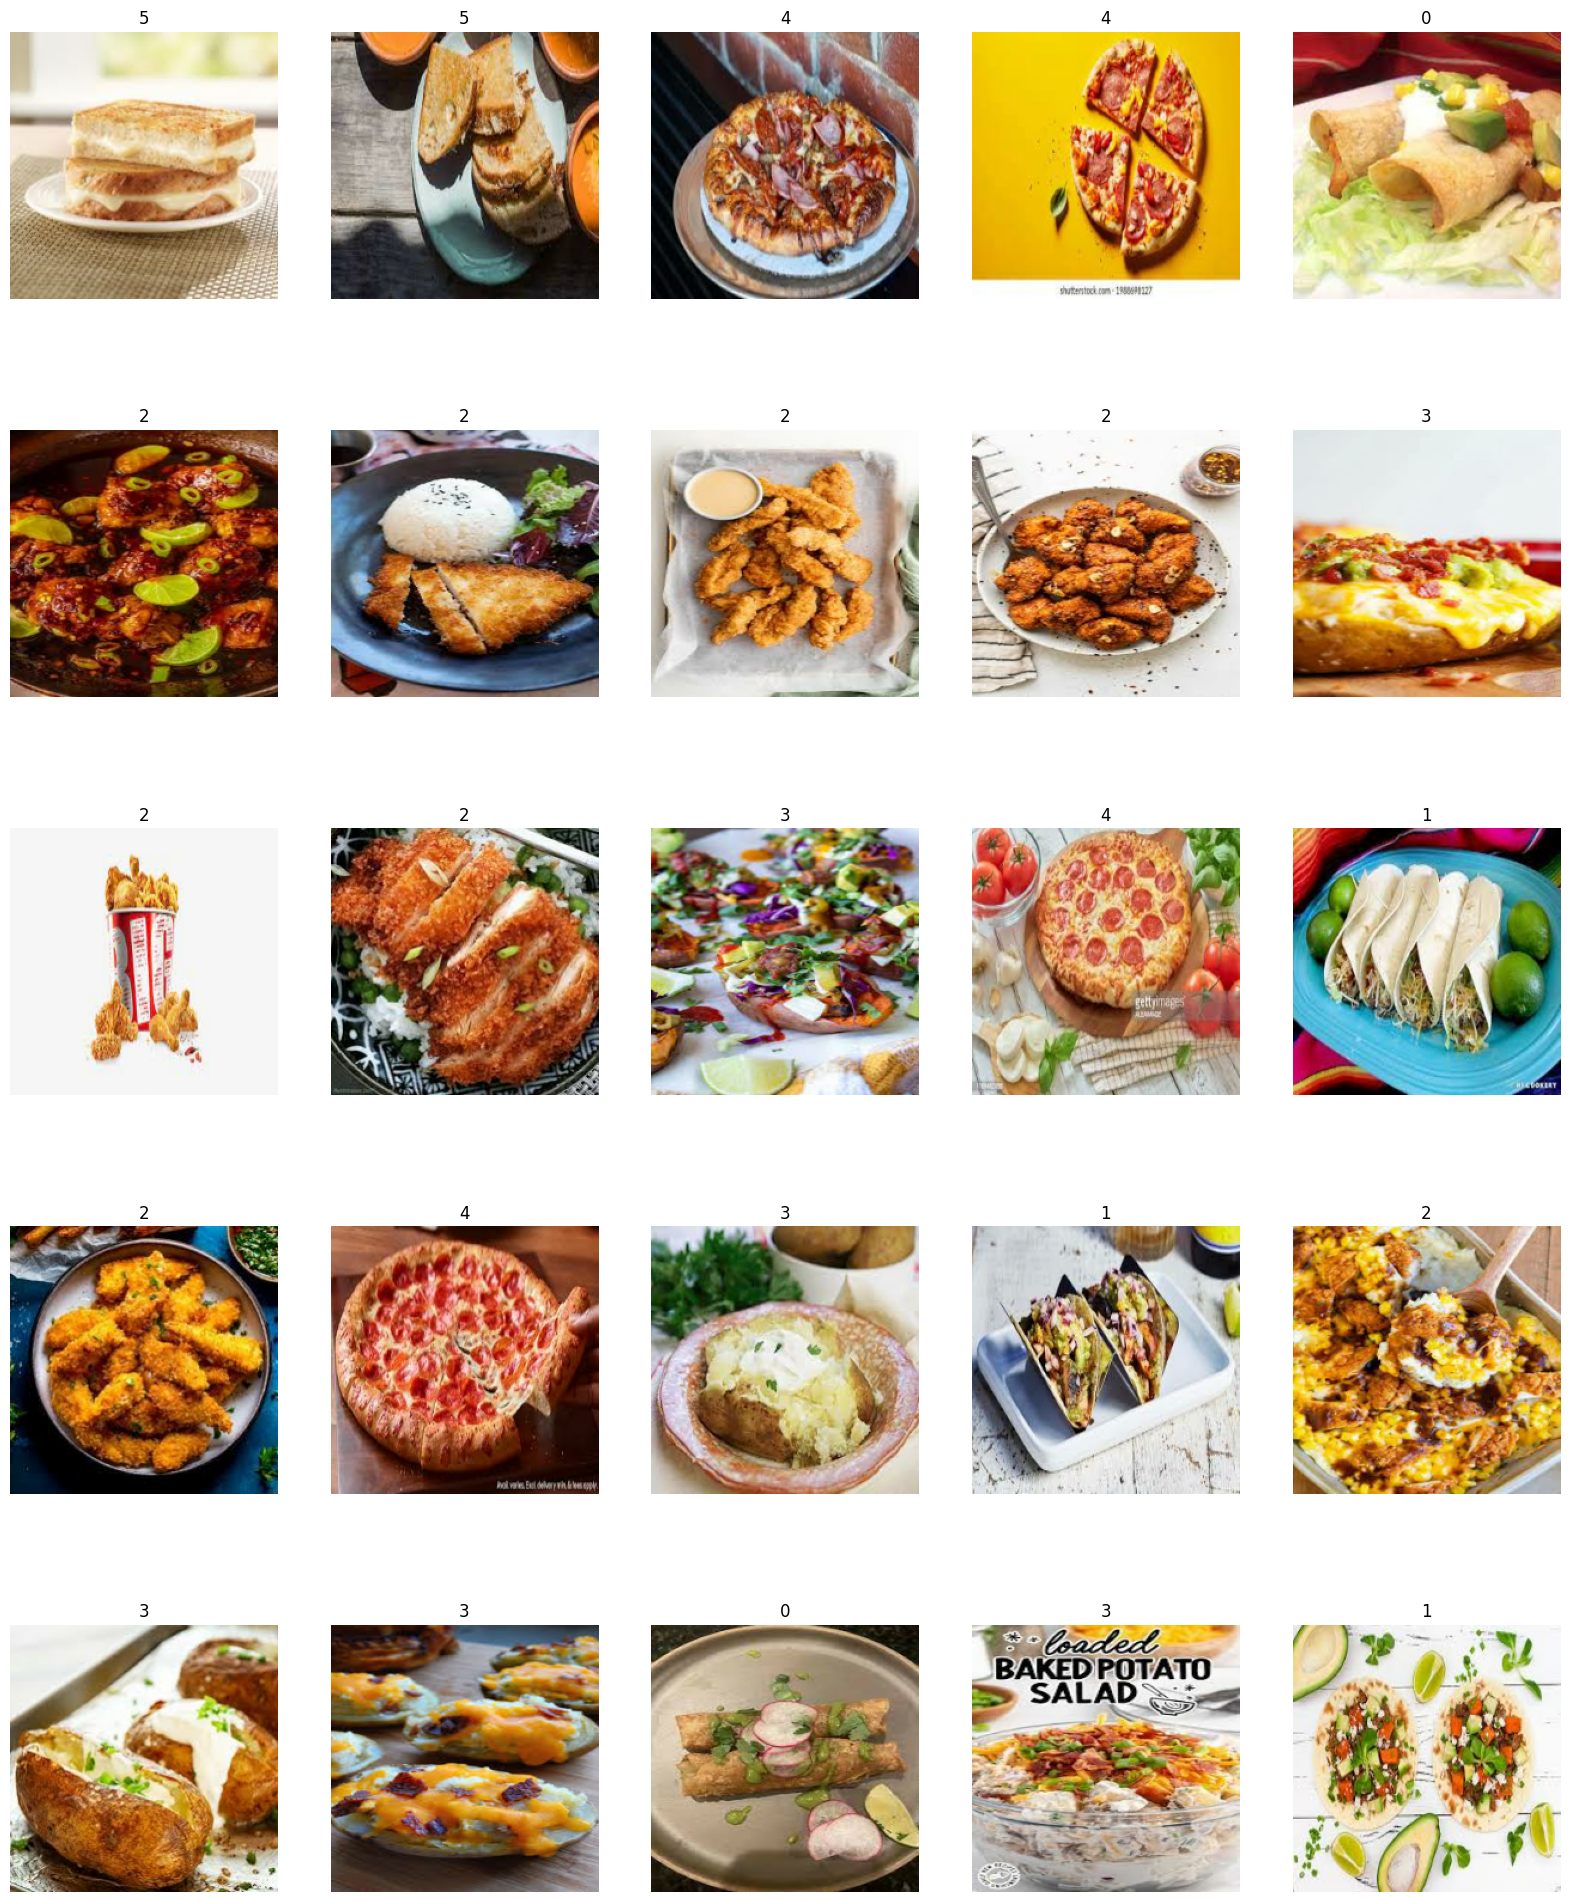

In [20]:
x = []
y = []
for image, label in train_ds.take(25):
  x.append(image)
  y.append(label)

fig, axs = plt.subplots(5,5, figsize=(20,25))

for i in range(5):
  for a in range(5):
    axs[i,a].imshow(x[0][5*i+a])
    name = y[0][5*i+a].numpy()
    axs[i,a].set_title(name)
    axs[i,a].axis('off')
plt.show()

##Do Some Transfer Learning

In [21]:
import tensorflow.keras.layers as lay
from tensorflow.keras.applications import MobileNet

net = MobileNet(weights='imagenet', include_top=True, input_shape=(224,224,3))

net_model = tf.keras.models.Sequential()

for i in range(len(net.layers)):
  net_model.add(net.layers[i])

for layer in net_model.layers:
  layer.trainable = False

net_model.pop()
net_model.add(lay.Dense(len(classes), activation='softmax'))

net_model.summary()

17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1 (Conv2D)                       │ (None, 112, 112, 32)        │             864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_bn (BatchNormalization)        │ (None, 112, 112, 32)        │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_relu (ReLU)                    │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1 (DepthwiseConv2D)          │ (None, 112, 112, 32)        │             288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_bn (BatchNormalization)    │ (None, 112, 112, 32)        │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_relu (ReLU)                │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1 (Conv2D)                   │ (None, 112, 112, 64)        │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_bn (BatchNormalization)    │ (None, 112, 112, 64)        │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_relu (ReLU)                │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pad_2 (ZeroPadding2D)           │ (None, 113, 113, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2 (DepthwiseConv2D)          │ (None, 56, 56, 64)          │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_bn (BatchNormalization)    │ (None, 56, 56, 64)          │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_relu (ReLU)                │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2 (Conv2D)                   │ (None, 56, 56, 128)         │           8,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_bn (BatchNormalization)    │ (None, 56, 56, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_relu (ReLU)                │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3 (DepthwiseConv2D)          │ (None, 56, 56, 128)         │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_bn (BatchNormalization)    │ (None, 56, 56, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_relu (ReLU)                │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_3 (Conv2D)                   │ (None, 56, 56, 128)         │          16,384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_3_bn (BatchNormalization)    │ (None, 56, 56, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 4,259,870 (16.25 MB)

 Trainable params: 6,006 (23.46 KB)

 Non-trainable params: 4,253,864 (16.23 MB)

In [22]:
#Train the Model
net_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
net_model.fit(train_ds, validation_data=val_ds, epochs=10)

Epoch 1/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 32s 84ms/step - accuracy: 0.5879 - loss: 1.6736 - val_accuracy: 0.7655 - val_loss: 0.8320
Epoch 2/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 27s 54ms/step - accuracy: 0.7964 - loss: 0.6666 - val_accuracy: 0.7873 - val_loss: 0.7351
Epoch 3/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 22s 60ms/step - accuracy: 0.8239 - loss: 0.5537 - val_accuracy: 0.7859 - val_loss: 0.7462
Epoch 4/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 15s 52ms/step - accuracy: 0.8389 - loss: 0.5147 - val_accuracy: 0.7964 - val_loss: 0.6953
Epoch 5/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 21s 54ms/step - accuracy: 0.8406 - loss: 0.4890 - val_accuracy: 0.7950 - val_loss: 0.7158
Epoch 6/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 23s 62ms/step - accuracy: 0.8486 - loss: 0.4917 - val_accuracy: 0.7664 - val_loss: 0.7917
Epoch 7/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 15s 52ms/step - accuracy: 0.8473 - loss: 0.4714 - val_accuracy: 0.7959 - val_loss: 0.7617
Epoch 8/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 21s 53ms/step - accuracy: 0.8573 - loss: 0.4427 - 

In [23]:
#See how it does on the test data
net_model.evaluate(test_ds)

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.8351 - loss: 0.6821


[0.704766035079956, 0.831250011920929]

##Enter Some Random Images

141679/141679 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


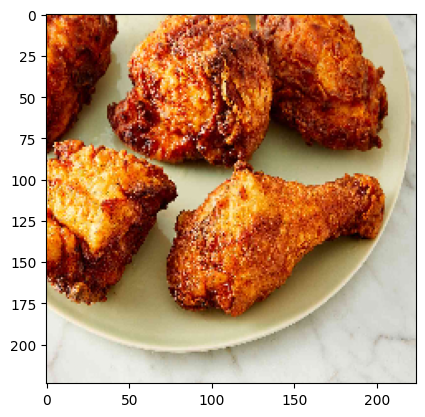

In [24]:
filepath = tf.keras.utils.get_file(
    "/content/image",
    "https://www.allrecipes.com/thmb/SoBuPU73KcbYHl3Kp3j8Xx4A3fc=/1500x0/filters:no_upscale():max_bytes(150000):strip_icc()/8805-CrispyFriedChicken-mfs-3x2-072-d55b8406d4ae45709fcdeb58a04143c2.jpg", #image url here
    )

img = tf.keras.utils.load_img(
            filepath,
            color_mode='rgb',
            target_size=(224,224))
os.remove("/content/image")
img = tf.keras.utils.img_to_array(img)
img = tf.cast(img, 'float32')/255.0
plt.imshow(img)

In [25]:
def predict(image):
  results = net_model.predict(tf.expand_dims(image, axis=0))
  highest = np.amax(results)
  class_num = results.tolist()[0].index(highest)
  return classes[class_num]

print(predict(img))

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Crispy Chicken
